In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mplcursors import cursor

df = pd.read_csv('../../assets/cleaned_data.csv')


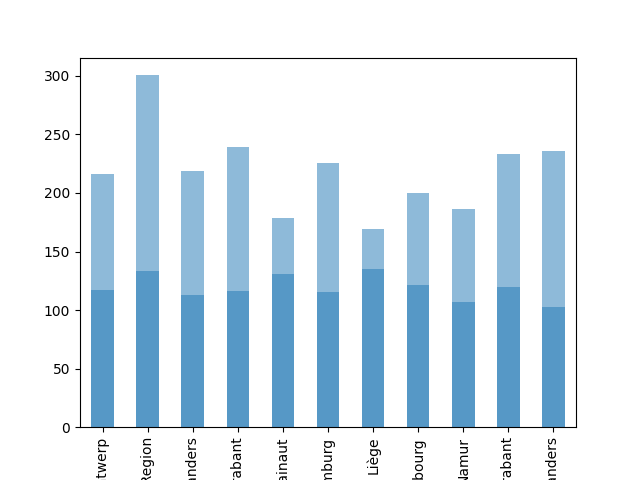

In [2]:

df['price_per_m2'] = df['price'] / df['living_area']

df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_surf = df_houses.groupby('province')['living_area'].mean()
df_appartments_surf = df_appartments.groupby('province')['living_area'].mean()

df_houses_surf.plot(kind ="bar", alpha = 0.50)
df_appartments_surf.plot(kind ="bar", alpha = 0.50)
cursor(hover=True)
plt.show()

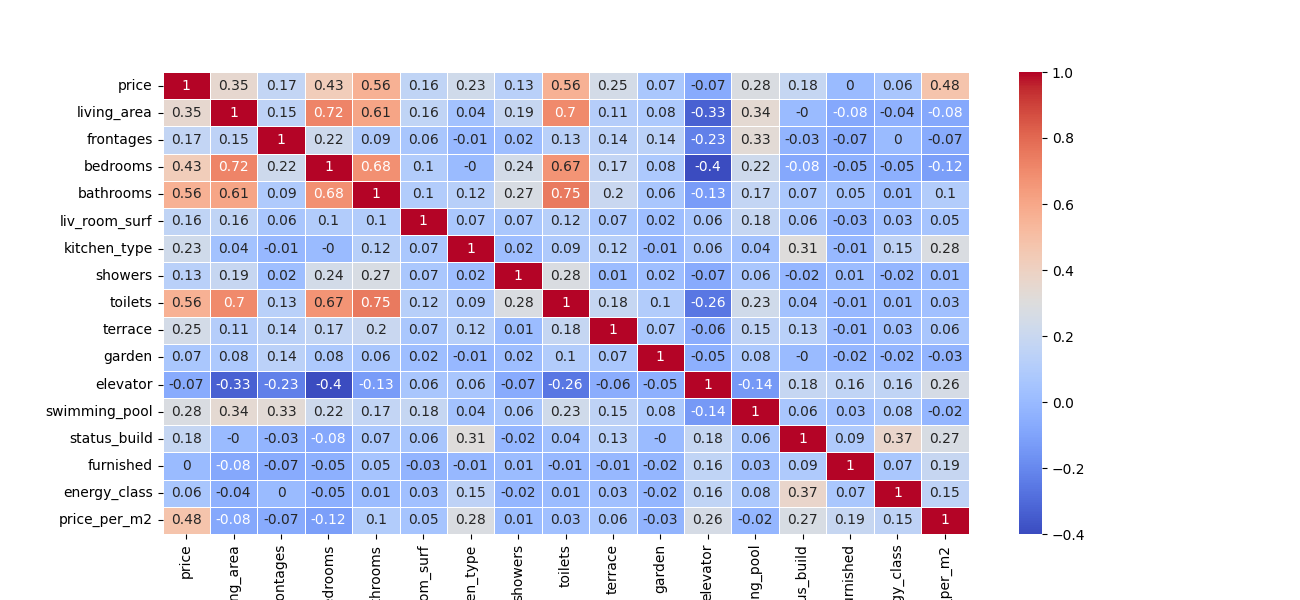

In [3]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks()
plt.show()